# BD Polabot #

La BD Polabot est une BD d'images polarimétriques de scènes extérieures, incluant des éléments hautement réfléchissants tels que des fenêtres ou des flaques d'eau. Cette BD est destinée à la recherche en mobilité robotique.

Les aucquisitions pour la BD ont été réalisées à l'aide de 4 caméras dont deux caméras RGB, une caméra NIR (Near-Infrared) et une caméra polarimétrique. 

Les dossiers sont organisés de la façon suivante :
* PolarCam : Images polarimétriques
* PolarCam_GroundTruth : La vérité terrain des images polarimétriques 
* BGR : Images en canaux RGB
* BGR_GroundTruth : Vérité terrain des images en canaux RGB
* Colormap.txt : Colormap pour l'affichage de la vérité terrain 

Lien vers le site de la BD : http://vibot.cnrs.fr/polabot.html

## Caractéristiques de la BD ##

Dans un premier temps, on va voir les caractéristiques des éléments de la BD (nombre d'éléments, taille, etc...)

In [13]:
import os
import imageio

# Structure des dossiers de la BD

path = "/Users/rblin/Downloads/PolaBot-Dataset"

dossiers = os.listdir(path)
print(dossiers)

elements_BGR = sorted(os.listdir(path + "/" + dossiers[1]))
# print(elements_BGR)
#print(len(elements_BGR))
# On veut supprimer l'élément qui n'est pas un fichier :
elements_BGR.remove("output")
elements_BGR.remove(".DS_Store")
#print(elements_BGR)
#print(len(elements_BGR))

# Caractéristiques des éléments contenus dans la BD

print("Taille de la BD : ", len(elements_BGR))
im = imageio.imread(path + "/" + dossiers[1] + "/" + elements_BGR[0])
print("Taille des images : ", im.shape)

['.DS_Store', 'BGR', 'colormap.txt', 'BGR_GroundTruth', 'PolarCam_GroundTruth', 'PolarCam']
Taille de la BD :  177
Taille des images :  (190, 254, 3)


[150, 148, 124, 146, 132, 24, 173, 13, 59]


<Figure size 432x288 with 0 Axes>

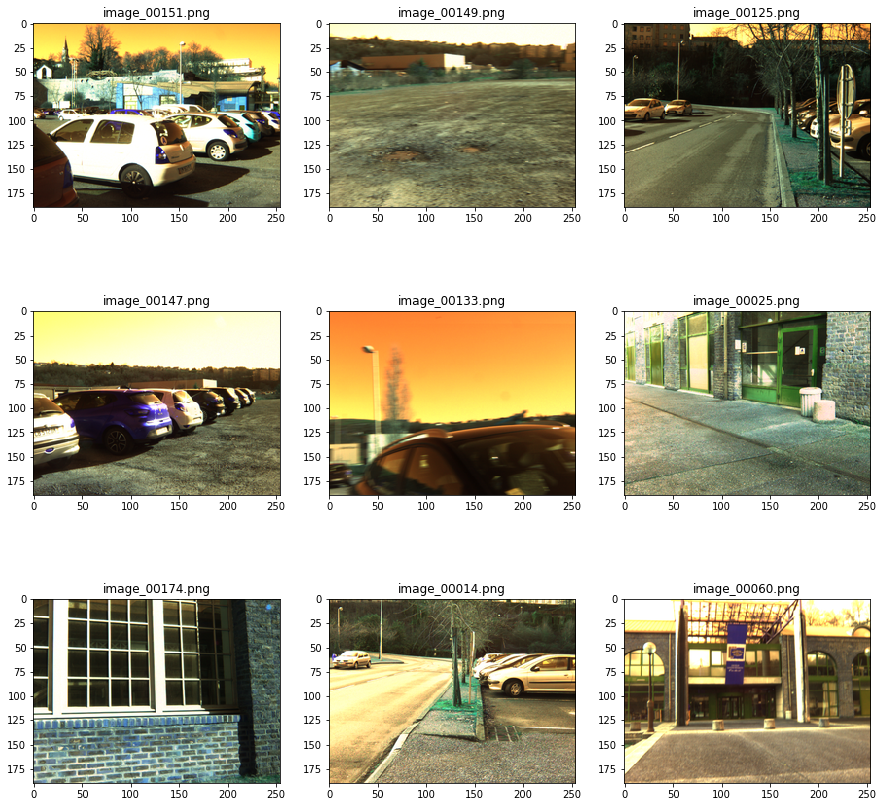

In [27]:
# Affichage de quelques images présentes dans la BD 

import pylab as pl
import random

indexes = random.sample(range(0,176),9)
print(indexes)

pl.figure(1)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(9) :
    pl.subplot(3,3,i+1)
    im_temp_path = path + "/" + dossiers[1] + "/" + elements_BGR[indexes[i]]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(elements_BGR[indexes[i]])

<Figure size 432x288 with 0 Axes>

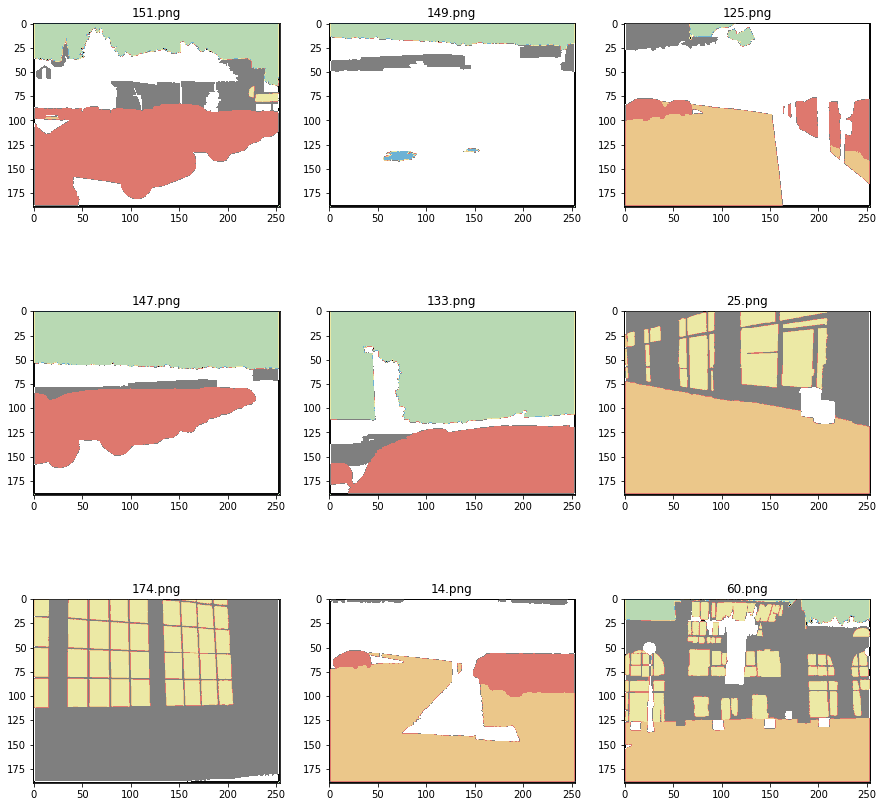

In [28]:
# Affichage de la vérité terrain de ces images 

# Liste des images de la vérité terrain 

elements_BGR_colorized_gt = os.listdir(path + "/" + dossiers[3] + "/Colorized_GroundTruth")

pl.figure(2)
pl.figure(figsize=(15,15))
pl.clf()
for j in range(9) :
    pl.subplot(3,3,j+1)
    im_temp_path = path + "/" + dossiers[3] + "/Colorized_GroundTruth/" + str(indexes[j]+1) + ".png"
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(str(indexes[j]+1)+".png")

Afin d'entraîner le réseau, chacun des images de la vérité terrain est dupliquée et légèrement modifiée 13 fois pour créer plus de diversité en entrée faute d'avoir assez d'image pour entraîner le réseau.

Ces images sont ensuites réparties dans des bases de train, test et val.

<Figure size 432x288 with 0 Axes>

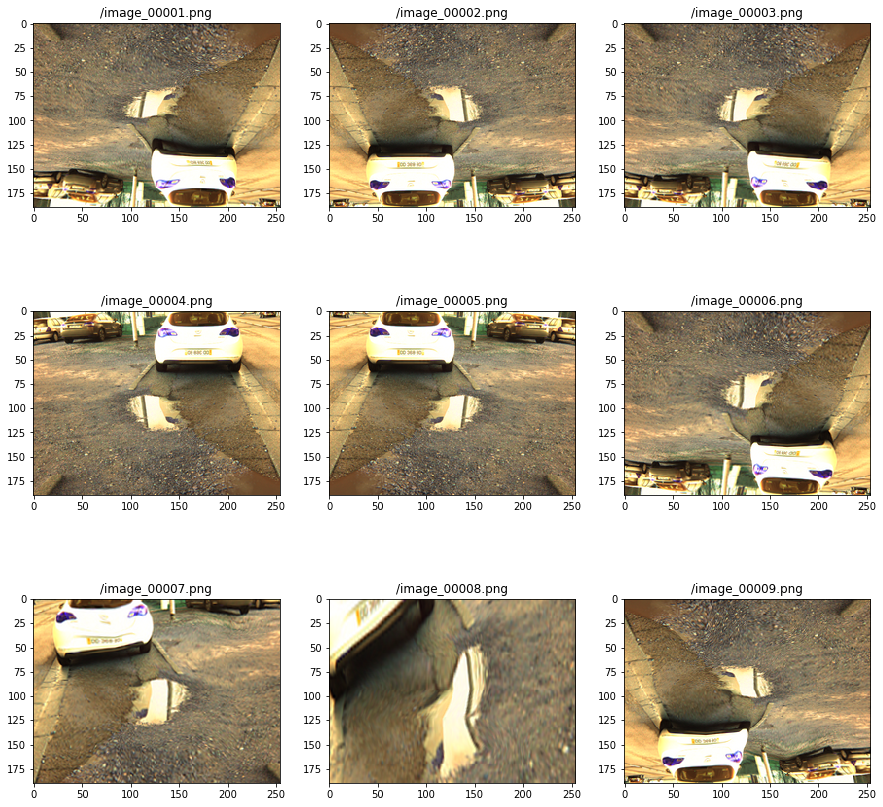

In [29]:
# Visualisation des images modifiées 

path_BGR_modif = path + "/" + dossiers[1] + "/output/image"
elements_BGR_modif = os.listdir(path_BGR_modif)

pl.figure(3)
pl.figure(figsize=(15,15))
pl.clf()
for k in range(9) :
    pl.subplot(3,3,k+1)
    im_temp_path = path_BGR_modif + "/image_0000" + str(k+1) + ".png"
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title("/image_0000" + str(k+1) + ".png")

<Figure size 432x288 with 0 Axes>

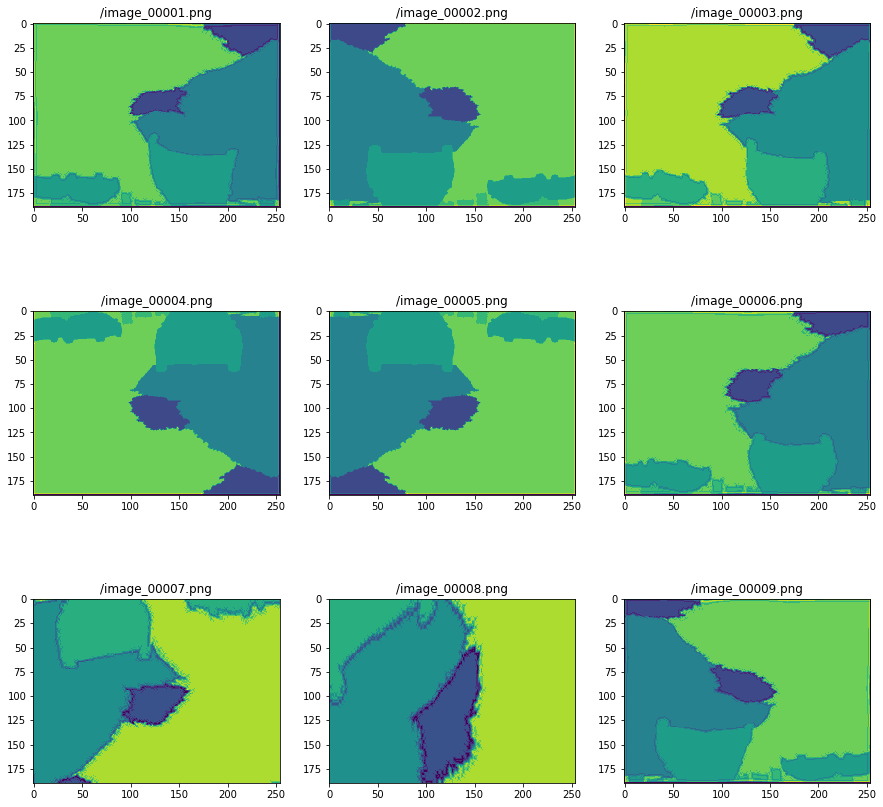

In [31]:
# Visualisation de la vérité terrain des images modifiées

path_BGR_modif_gt = path + "/" + dossiers[1] + "/output/gt"
elements_BGR_modif_gt = os.listdir(path_BGR_modif_gt)

pl.figure(4)
pl.figure(figsize=(15,15))
pl.clf()
for l in range(9) :
    pl.subplot(3,3,l+1)
    im_temp_path = path_BGR_modif_gt + "/image_0000" + str(l+1) + ".png"
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title("/image_0000" + str(l+1) + ".png")

Maintenant que l'on a visualisé tout ce qui touchait aux images RGB on va maintenant regarder ce qui concerne les images polarimétriques.

[89, 134, 85, 8, 109, 108, 113, 118, 119]


<Figure size 432x288 with 0 Axes>

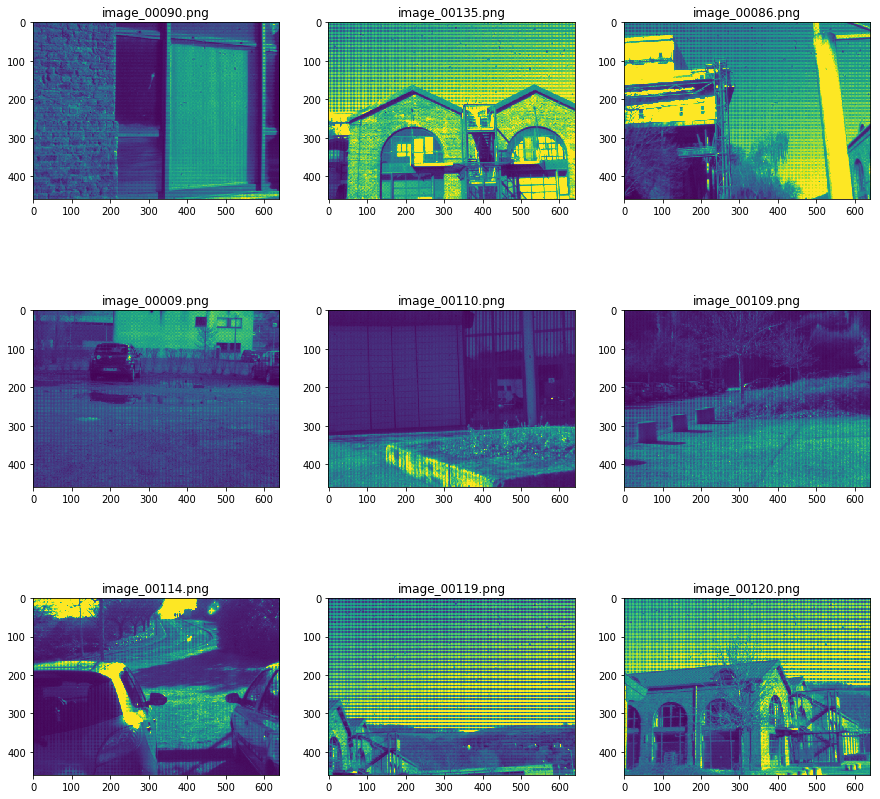

In [40]:
# Visualisation des images polarimétriques

path_polar = path + "/" + dossiers[5]

elements_polar = sorted(os.listdir(path_polar))
#print(elements_polar)
elements_polar.remove(".DS_Store")

indexes = random.sample(range(0,176),9)
print(indexes)

pl.figure(5)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(9) :
    pl.subplot(3,3,i+1)
    im_temp_path = path_polar + "/" + elements_polar[indexes[i]]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(elements_polar[indexes[i]])

<Figure size 432x288 with 0 Axes>

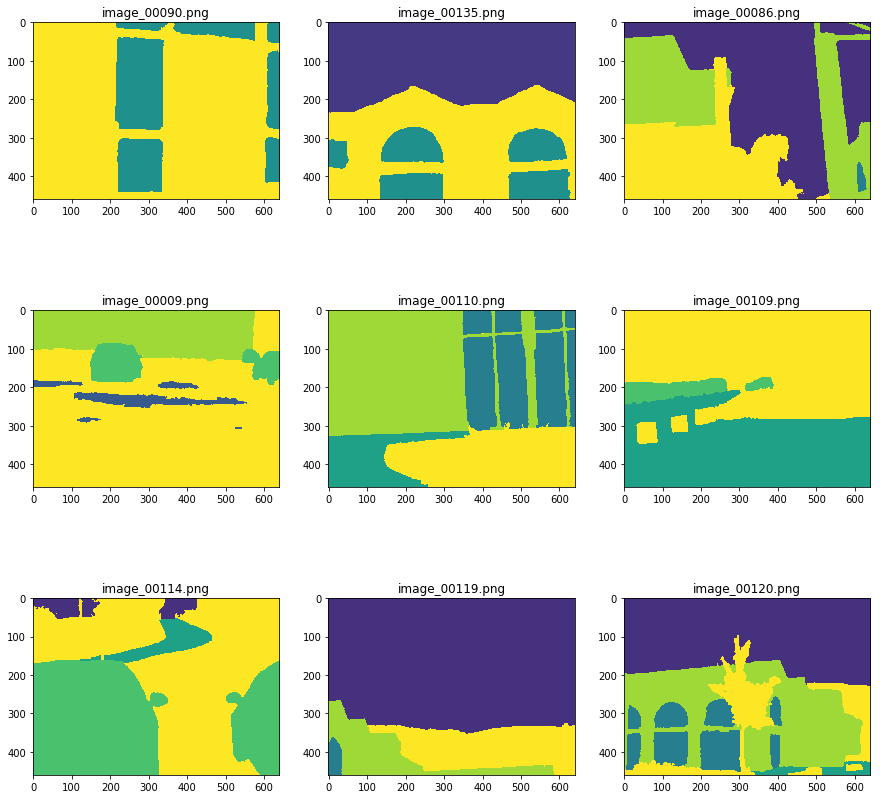

In [41]:
# Visualisation de la GT des images polarimétriques 

path_polar_gt = path + "/" + dossiers[4]

elements_polar_gt = sorted(os.listdir(path_polar_gt))
#print(elements_polar_gt)
elements_polar_gt.remove(".DS_Store")
elements_polar_gt.remove("Colorized_GroundTruth")

pl.figure(6)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(9) :
    pl.subplot(3,3,i+1)
    im_temp_path = path_polar_gt + "/" + elements_polar_gt[indexes[i]]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(elements_polar_gt[indexes[i]])

## Conclusion et impressions de la BD ##

Le problème principal de cette BD est que beaucoup des scènes extérieures ne contiennent pas de voiture. De plus, aucune de ces scènes exétieures ne contient de piéton ce qui est problématique pour notre cas de figure. Cependant, cette BD pourra potentiellement être utile pour réaliser les expériences préliminaires, à savoir comparer les performances de la détection des images RGB et des images polarimétriques. 